In [3]:
import torch
import models_jw
from utils import *
from tqdm import tqdm
import numpy as np
from configs import paramsuper, getters

device = "cuda"

args = paramsuper.ICIFARHashResNet18()

torch.manual_seed(args.seed)
np.random.seed(0)

use_cuda = not args.no_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
training_period = 20000

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = getters.get_dataset(args.dataset, training_period, args.batch_size, True, kwargs)

torch.manual_seed(1)
np.random.seed(0)

net2 = models_jw.HashResNet18(10).to(device)
net2.load_state_dict(torch.load("trained_models/5_tasks_hunge10.pth"))

Files already downloaded and verified
Files already downloaded and verified


<All keys matched successfully>

In [4]:
# EVALUATE WITHOUT task_num

num_test = 10
test_loader = getters.get_dataset(args.dataset, 1, 5, False, kwargs)
accs_test =  {i: 0 for i in range(num_test)}

zzz = {}
for time in tqdm(range(num_test)):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)        
    y_hat, z, losses = net2(X)
    zzz[time] = z 
    #accs[time] = accs[time] + (y_hat.min(1).indices==y).sum().item()
    accs_test[time] = accs_test[time] + (torch.tensor(y_hat) == y.to("cpu")).sum().item()
    

Files already downloaded and verified
Files already downloaded and verified


 60%|██████    | 6/10 [01:13<00:48, 12.15s/it]

In [4]:
accs_test

{0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0}

In [3]:
zzz

{0: [tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>)],
 1: [tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
         grad_fn=<CatBackward0>),
  tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], device='cuda:0',
       

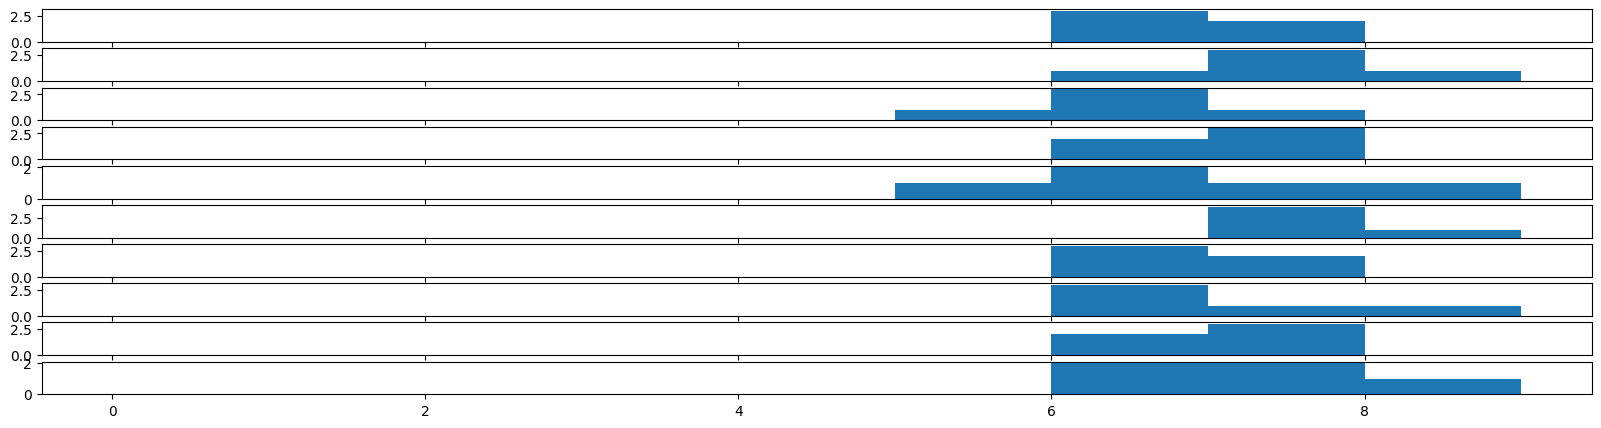

In [6]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(10, figsize=(20,5))
for i in range(10):
    axs[i].hist(torch.stack(zzz[i]).min(1).indices.cpu().numpy(), bins=range(10))

In [39]:
torch.FloatTensor([1]).cuda() *10000


tensor([10000.], device='cuda:0')